In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Using a known function

We will optimize the following equation: 

$y = (x - 5)^2 = 3$

Which we know the minimum is:

$x = 5$
$y = 3$

In [2]:
X = np.linspace(0, 10, 100)
y = 3 + np.power((X - 5), 2)

Let's plot our data to check the relation between X and y

(0.0, 10.0)

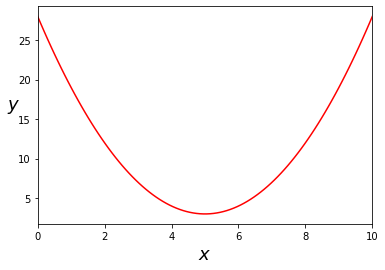

In [3]:
plt.plot(X, y, "red")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlim((0, 10))

# Gradient Descent

### Cost Functions & Gradients

Remember that in optimization methods we optimize a given cost.  In our case it will be the quadratic equation below.  The gradient is precalculated.

Cost 

$y = (X - 5)^2 + 3$

Gradient

$2 * (X - 5)$

In [4]:
def cost(X):
    return 3 + np.power((X - 5), 2)

In [5]:
def gradient(X):
    return 2 * (X - 5)

In [6]:
def gradient_descent(X, learning_rate=0.01, iterations=100, print_all=True):
    costs = []
    for it in range(iterations):
        X = X - learning_rate * gradient(X)
        if it % 50 == 0 and print_all:
            print("The iteration is {} and the current value of X is {}".format(it, X))
        costs.append(cost(X))
    return X, costs

Let's start from a random number between 0 and 1, with 200 iterations and a learning rate of 0.01

In [7]:
lr = 0.01
n_iter = 200
X = np.random.random() * 10
X, costs = gradient_descent(X, lr, n_iter)
print("Miniumum is at (x, y) = ({}, {})".format(X, cost(X)))

The iteration is 0 and the current value of X is 7.777723591367775
The iteration is 50 and the current value of X is 6.011562711638841
The iteration is 100 and the current value of X is 5.368380469085574
The iteration is 150 and the current value of X is 5.134152997577234
Miniumum is at (x, y) = (5.049851483888195, 3.002485170445855)


Let's plot the cost history over iterations

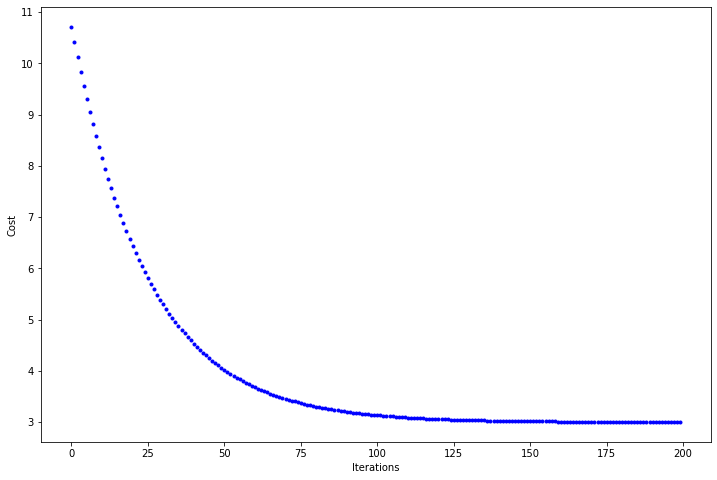

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel("Cost")
ax.set_xlabel("Iterations")
_ = ax.plot(range(n_iter), costs, "b.")

After around 120 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization.  And if the learning rate is bigger?

The iteration is 0 and the current value of X is 1.3957592595277122
Minimum is at (x, y) = (4.99993569819649, 3.000000004134722)


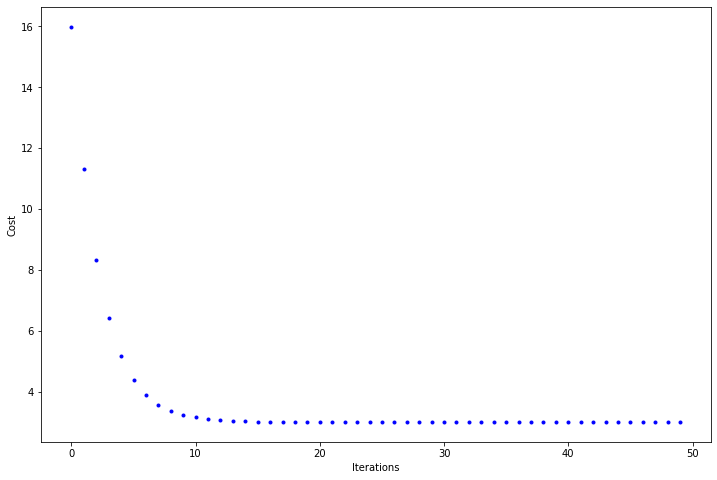

In [9]:
new_lr = 0.1
new_n_iter = 50
X_b = np.random.random()
X_new, costs_new = gradient_descent(X_b, new_lr, new_n_iter)
print("Minimum is at (x, y) = ({}, {})".format(X_new, cost(X_new)))

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel("Cost")
ax.set_xlabel("Iterations")
_ = ax.plot(range(new_n_iter), costs_new, "b.")

Clearly with a higher learning rate we got to the optimal point in 10 iterations. Let's see how this changes with different learning rates.

The iteration is 0 and the current value of X is 0.8352611289567325
The iteration is 50 and the current value of X is 3.483328377685792
The iteration is 100 and the current value of X is 4.447674180504626
The iteration is 150 and the current value of X is 4.798859683010513
Minimum is at (x, y) = (4.925255913376855, 3.005586678485128)
The iteration is 0 and the current value of X is 1.6002131664952919
The iteration is 50 and the current value of X is 4.999951476620862
The iteration is 100 and the current value of X is 4.999999999307451
The iteration is 150 and the current value of X is 4.99999999999999
Minimum is at (x, y) = (4.999999999999998, 3.0)
The iteration is 0 and the current value of X is 9.249733541880884
The iteration is 50 and the current value of X is 9.249733541880884
The iteration is 100 and the current value of X is 9.249733541880884
The iteration is 150 and the current value of X is 9.249733541880884
Minimum is at (x, y) = (0.7502664581191159, 21.060235176987444)
The it

<ipython-input-4-1d395e57dc64>:2: RuntimeWarning: overflow encountered in power
  return 3 + np.power((X-5), 2)


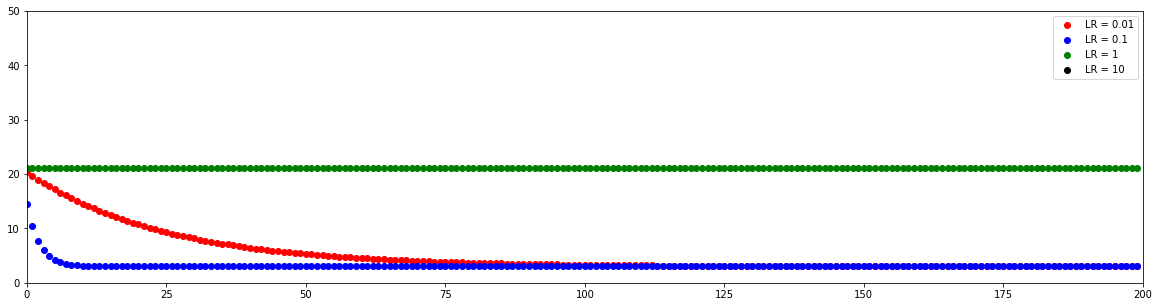

In [10]:
learning_rates = [0.01, 0.1, 1, 10]
iterations = 200
X_0 = np.random.random()
plt.figure(figsize=(20, 5))
all_costs = []
for lr in learning_rates:
    X, costs = gradient_descent(X_0, lr, iterations, print_all=True)
    print("Minimum is at (x, y) = ({}, {})".format(X, cost(X)))
    all_costs.append(costs)

ax.set_ylabel("Cost")
ax.set_xlabel("Iterations")
plt.xlim((0, 200))
plt.ylim((0, 50))
plt.scatter(range(iterations), all_costs[0], color="red")
plt.scatter(range(iterations), all_costs[1], color="blue")
plt.scatter(range(iterations), all_costs[2], color="green")
plt.scatter(range(iterations), all_costs[3], color="black")
plt.legend(["LR = 0.01", "LR = 0.1", "LR = 1", "LR = 10"])
plt.show()